In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

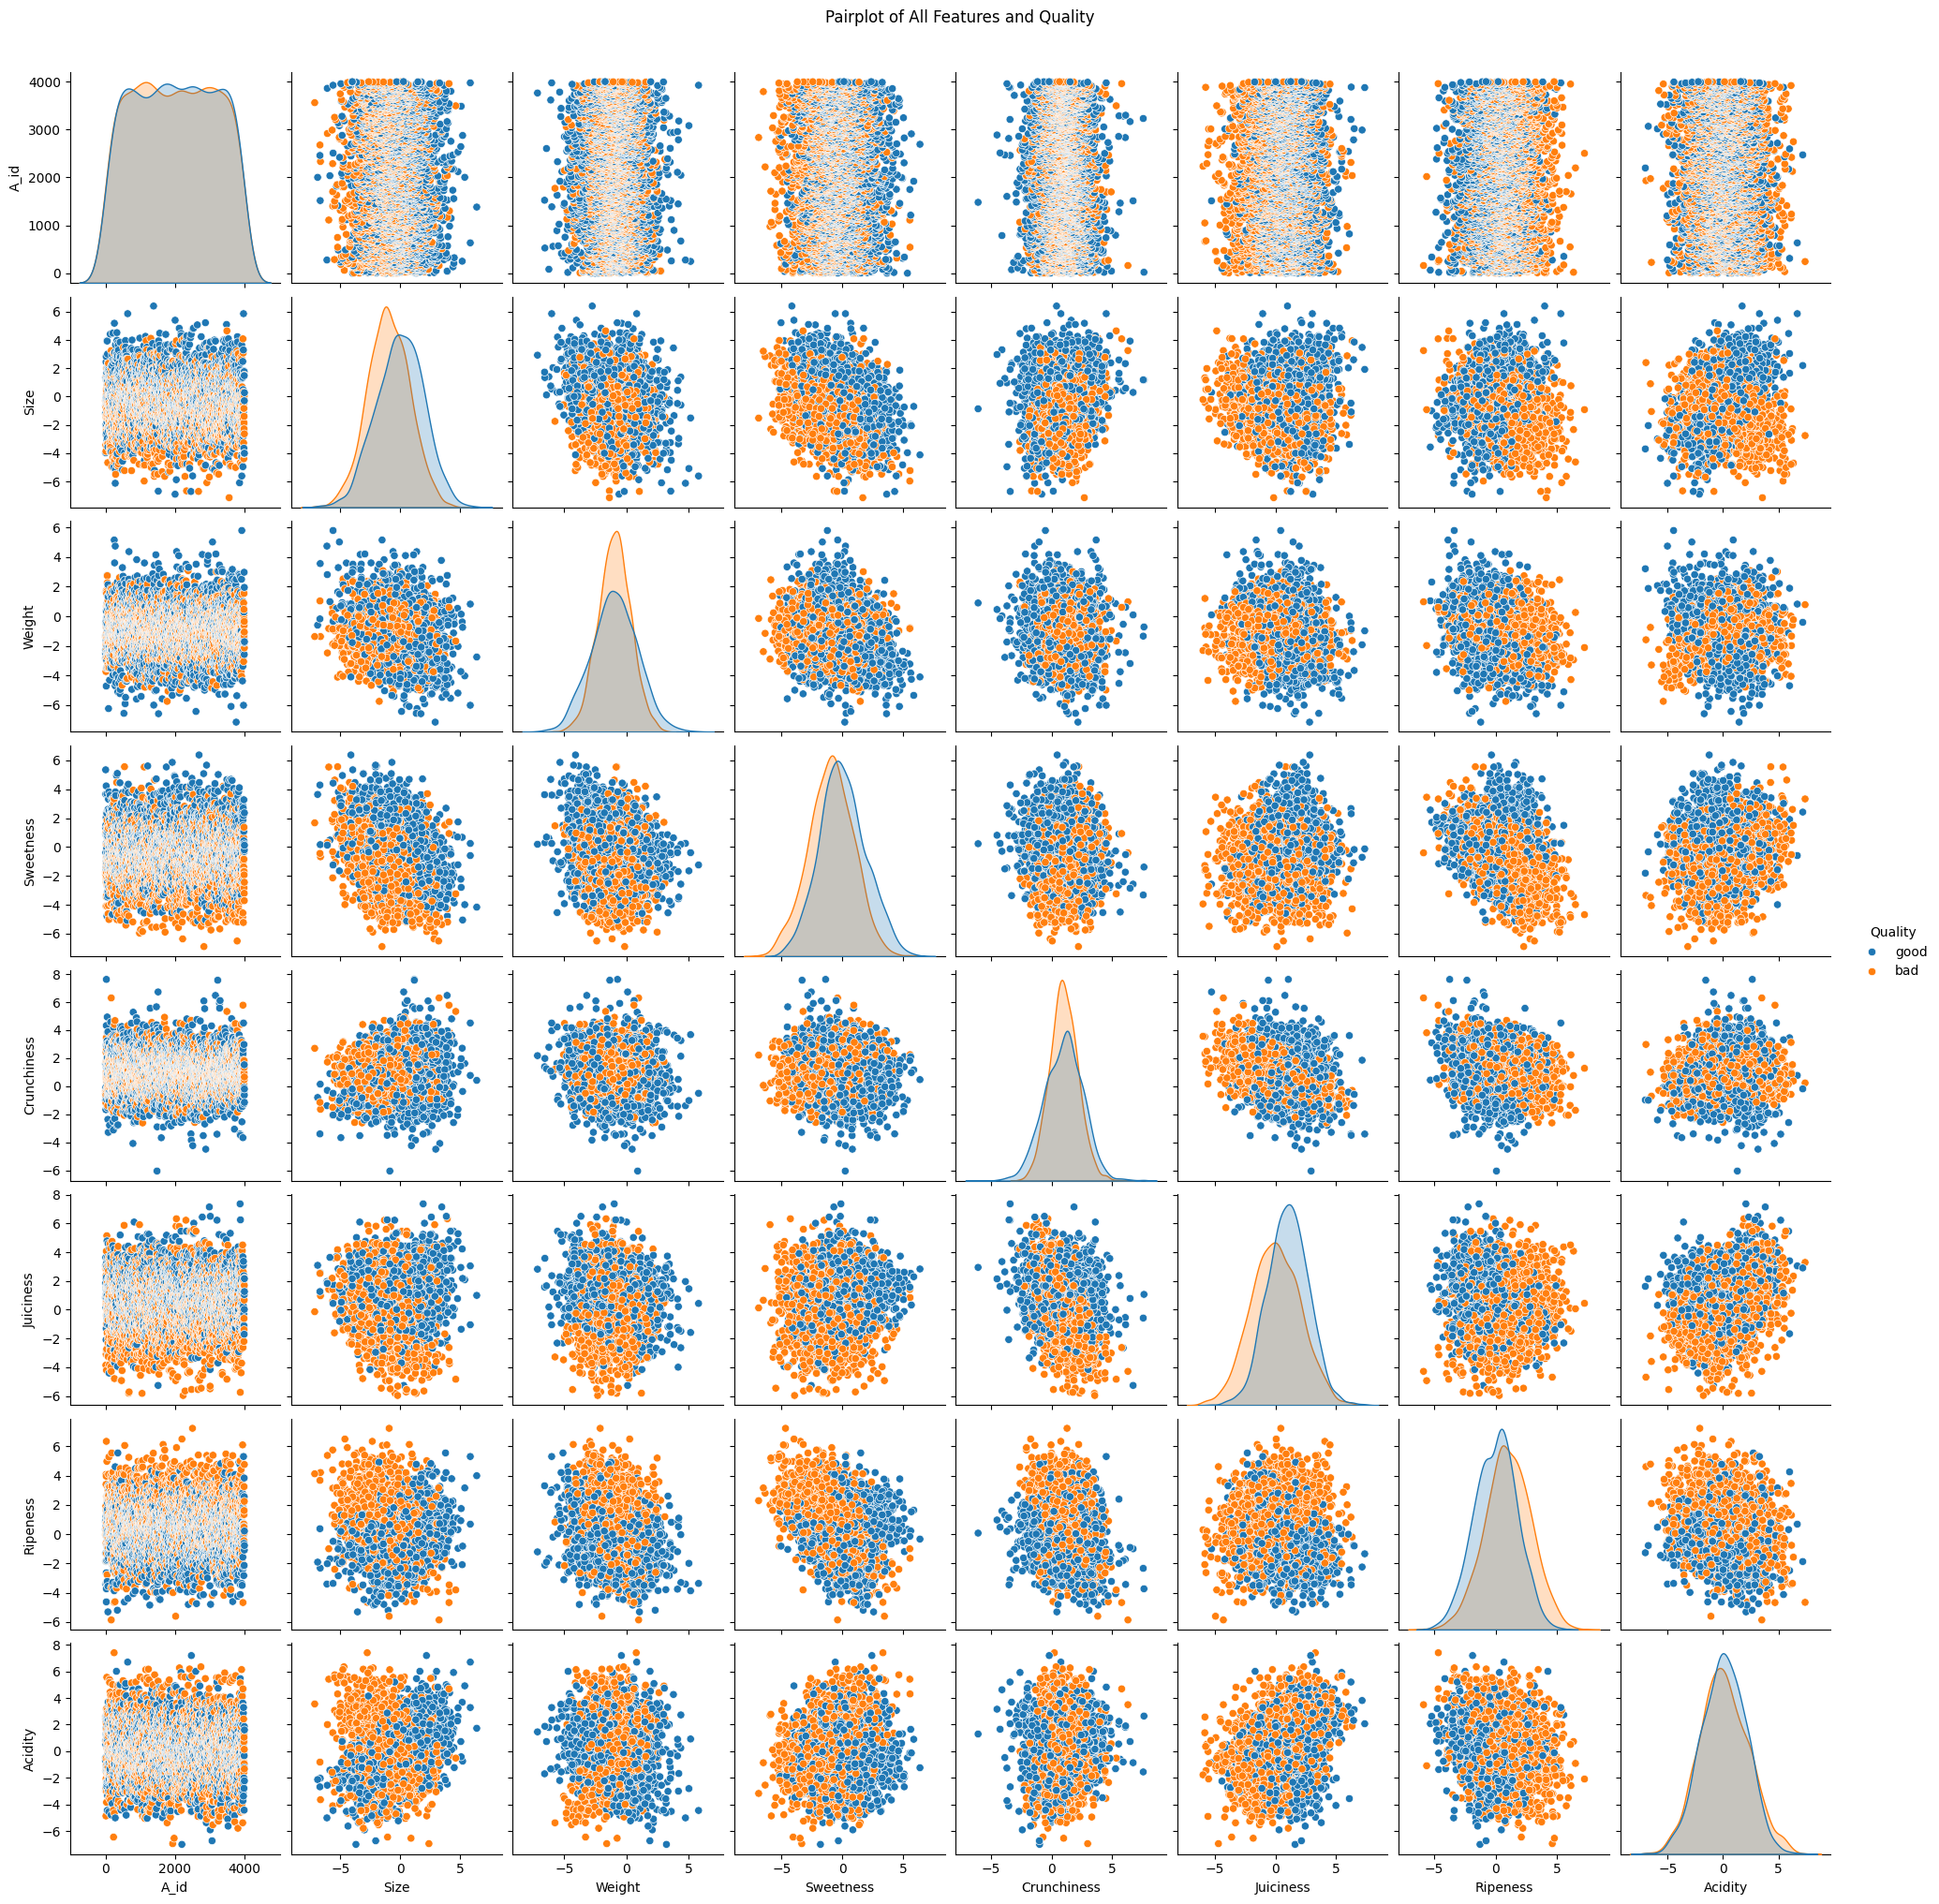

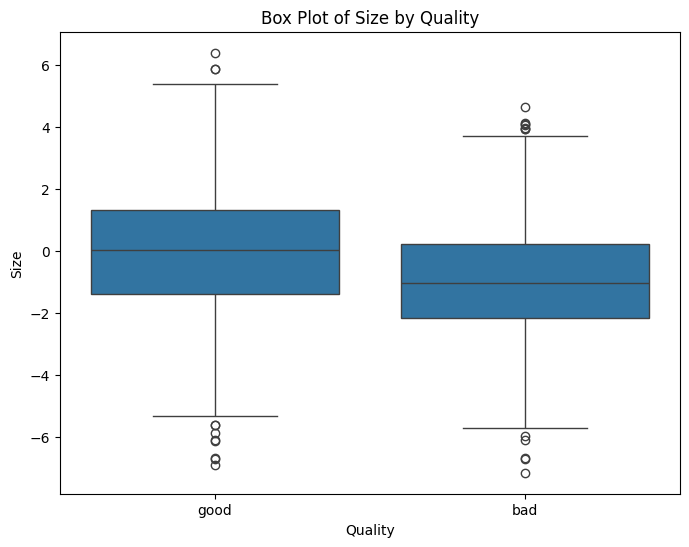

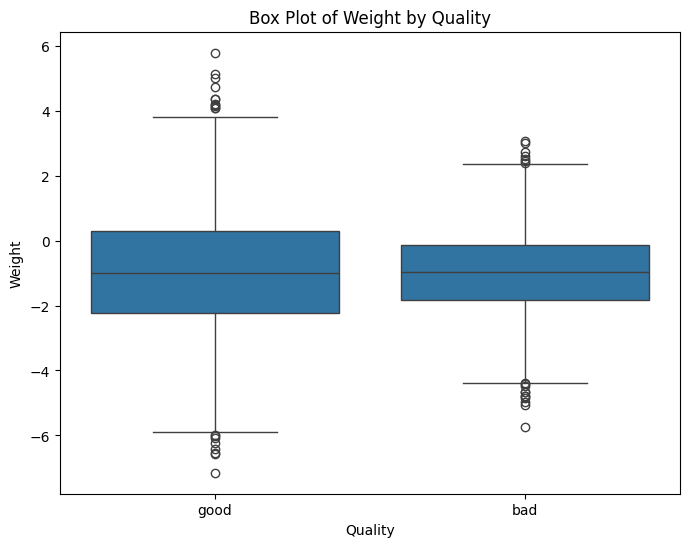

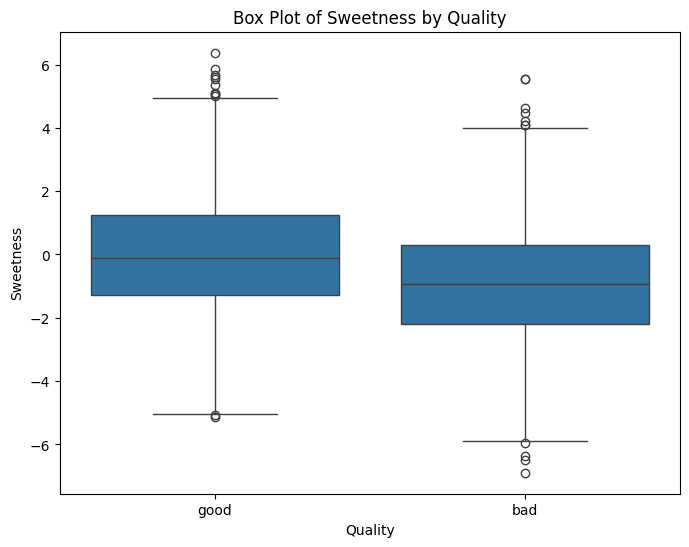

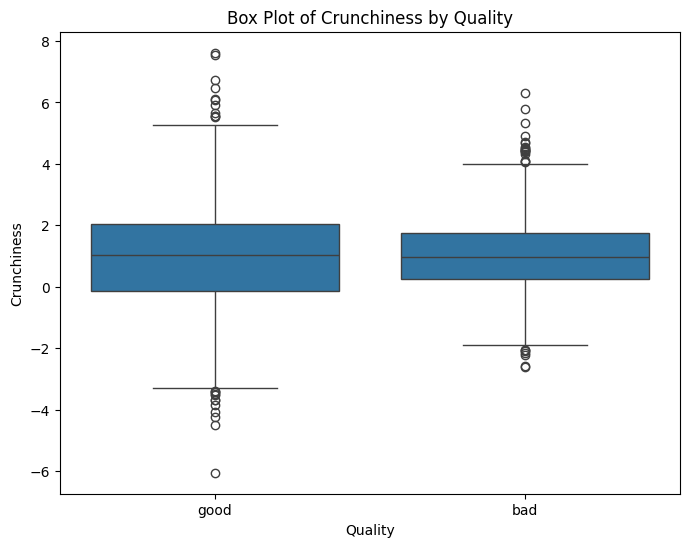

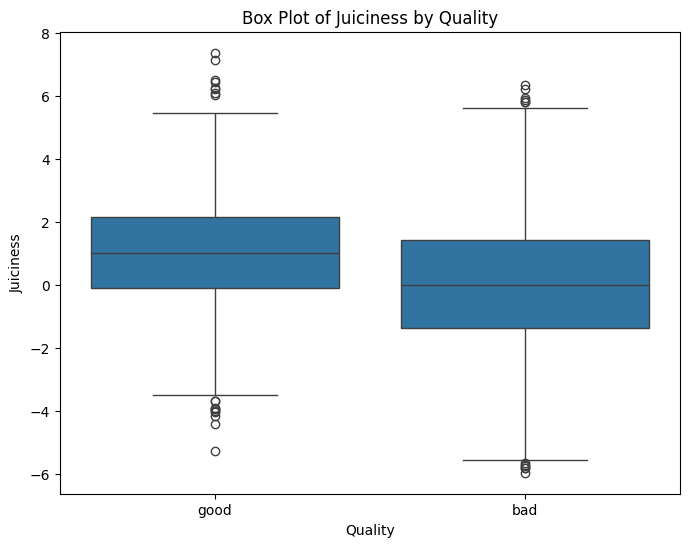

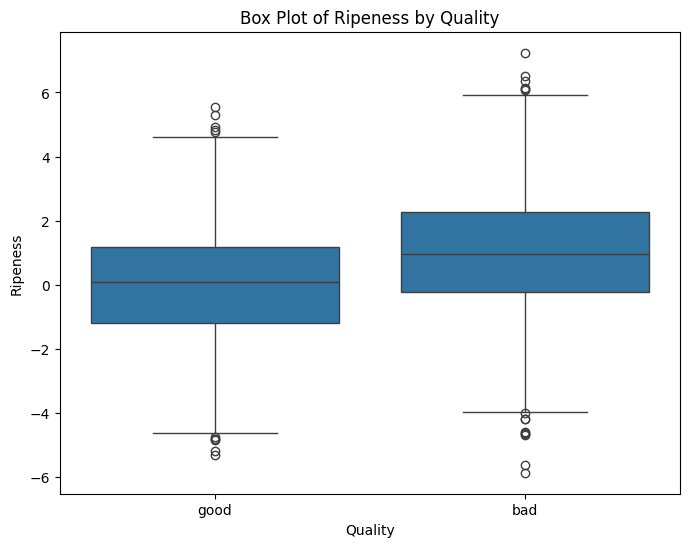

In [43]:
df = pd.read_csv('apple_quality.csv')
sns.pairplot(df, hue='Quality', diag_kind='kde')
plt.suptitle('Pairplot of All Features and Quality', y=1.02)
plt.show()
for i in range(1, len(df.columns) - 2):
    column = df.columns[i]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Quality', y=column, data=df)
    plt.title(f'Box Plot of {column} by Quality')
    plt.show()


In [34]:
X = df.drop(['A_id', 'Quality'], axis=1)
y = df['Quality']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Accuracy: 0.89625
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



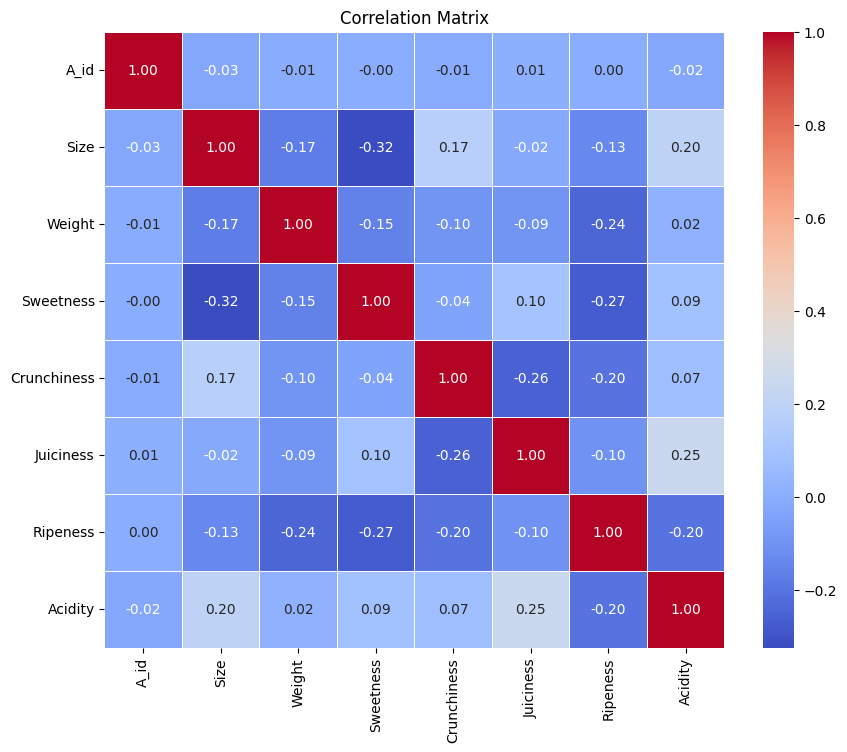

In [41]:
print(f'Accuracy of Classification Model: {accuracy}')
print('Classification Report:\n', classification_rep)
plt.figure(figsize=(10, 8))
df = df.drop(['Quality'], axis=1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()